## Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\INEURONE PROJECTS\US-VISA\NOTEBOOK\EasyVisa.csv")
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

## Data Cleaning


### Handling Missing values
* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [4]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [5]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [6]:
features_with_na

[]

* There are no null values

#### Handling Duplicates

In [7]:
df.duplicated().sum()

0

* No Duplicates in the dataset

In [8]:
# Remove case_id from the dataset as it cannot used in Model Training

df.drop('case_id', axis = 1, inplace = True)

In [9]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## Feature Engineering

#### Feature Extraction

In [10]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [11]:
# importing date class from datetime module
from datetime import date

# creating the date object of today's date
todays_date = date.today()
current_year = todays_date.year

In [12]:
current_year

2024

In [13]:
todays_date

datetime.date(2024, 8, 12)

#### Subtract current year with year of estab to get company's age

In [14]:
df['company_age'] = current_year - df['yr_of_estab']
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [15]:
df.drop('yr_of_estab', inplace = True, axis = 1)

## Type of Features

#### Numeric Features

In [16]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != "O"]
print(" Number of Numerical Features :", len(numeric_feature))

 Number of Numerical Features : 3


#### Categorical Features

In [17]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]
print(" Number of categorical Features :", len(categorical_feature))

 Number of categorical Features : 8


#### Discrete Feature

In [18]:
discrete_feature = [feature for feature in numeric_feature if len(df[feature].unique()) <= 25]
print(" Number of discrete Features :", len(discrete_feature))

 Number of discrete Features : 0


#### continous features

In [19]:
continous_features = [feature for feature in numeric_feature if len(df[feature].unique()) >= 25]
print(" Number of continous Features :", len(continous_features))

 Number of continous Features : 3


## Split X and Y
* Split Dataframe to X and y
* Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.

In [20]:
X = df.drop('case_status', axis = 1)
y = df['case_status']

In [21]:
y

0           Denied
1        Certified
2           Denied
3           Denied
4        Certified
           ...    
25475    Certified
25476    Certified
25477    Certified
25478    Certified
25479    Certified
Name: case_status, Length: 25480, dtype: object

In [22]:
# If the target column has Denied it is encoded as 1 others as 0
y = np.where(y=='Denied', 1, 0)

In [23]:
y

array([1, 0, 1, ..., 0, 0, 0])

## Feature Transformation

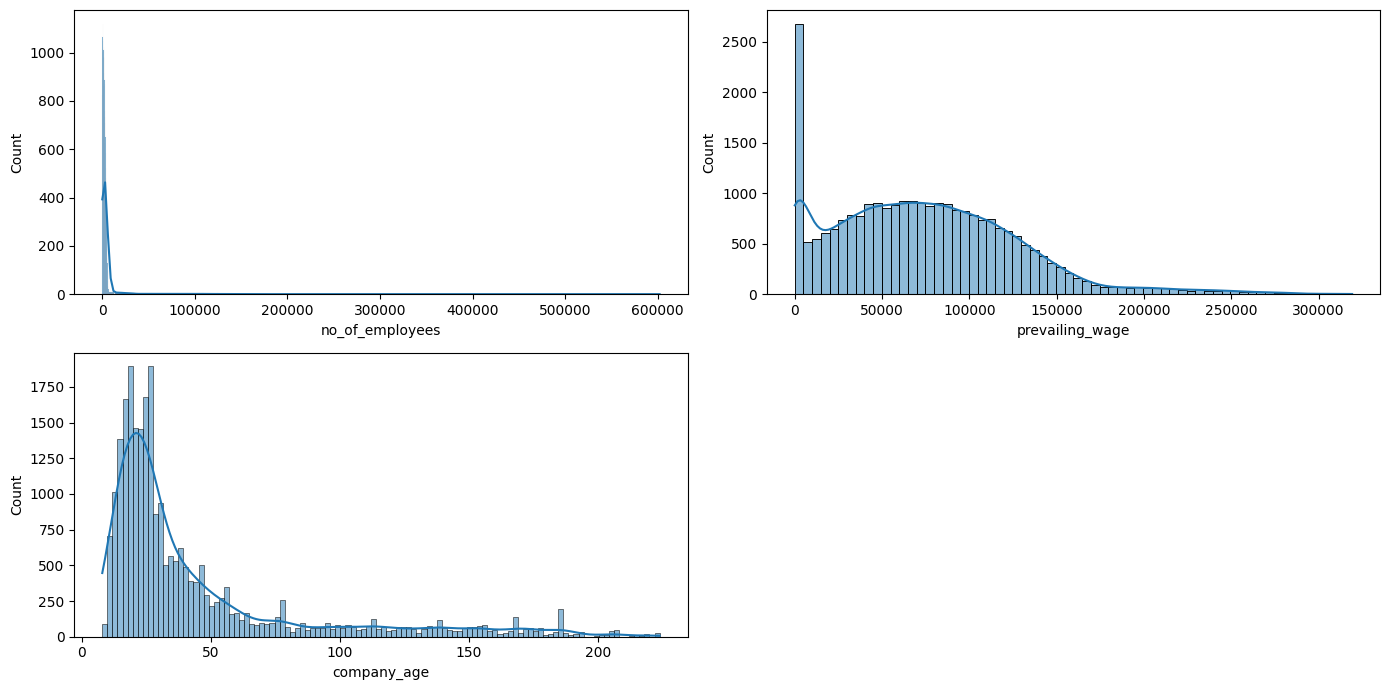

In [24]:
plt.figure(figsize=(14,7))
for i in range(0, len(numeric_feature)):
    plt.subplot(2,2,i+1)
    sns.histplot(x = X[numeric_feature[i]], kde = True)
    plt.tight_layout()


* No of employees and Copmany age column is skewed
* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

#### Checking Skewness

#### What is Skewness ?

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [25]:
# cheacking skewness
X[numeric_feature].skew()

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

* Positiviely Skewed : company_age, no_of_employees.
* We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [26]:
from sklearn.preprocessing import PowerTransformer

In [27]:
pt = PowerTransformer()
transform_features = ['company_age','no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [28]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

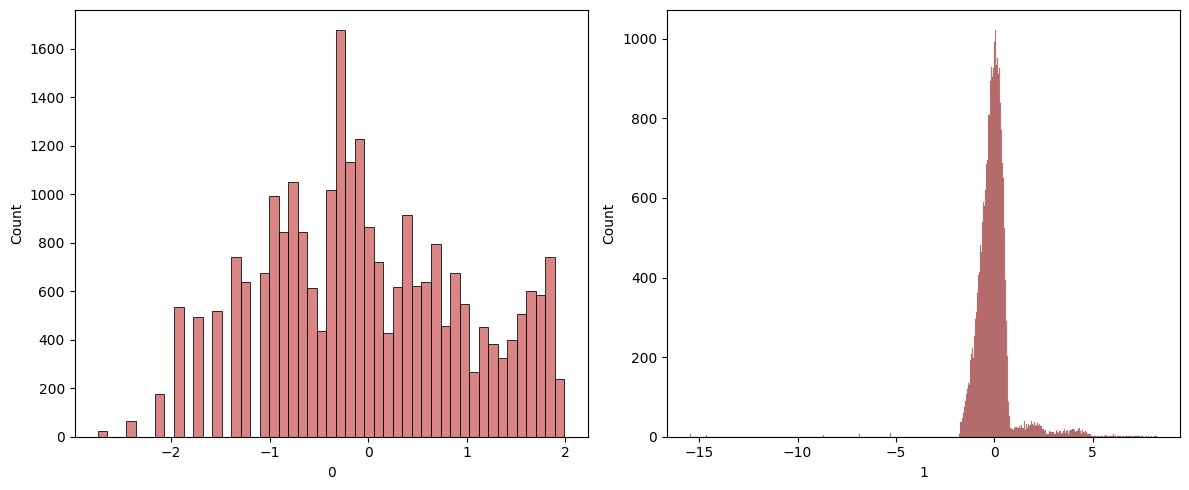

In [29]:
plt.figure(figsize=(12, 5))
for i in range(0, len(transform_features)):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[transform_features[i]], color='indianred')
    plt.xlabel(i)
    plt.tight_layout()

In [30]:
X_copy.skew()

company_age        0.103264
no_of_employees    0.399339
dtype: float64

* Here default Yeo-Johnson is used and it supports both positive or negative data for transformation.
* So Power Transformer with yeo-johnson can be used

In [31]:
for feature in categorical_feature:
    print(feature, ':', df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


## Feature Encoding and Scaling

#### One Hot Encoding for Columns which had lesser unique values and not ordinal

* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

#### Ordinal Encoding for Columns which has many unique categories

* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

#### Standard Scaler

* Standardize features by removing the mean and scaling to unit variance.

#### Power Transformer

* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

#### Selecting number features for preprocessing

In [32]:
num_features = list(X.select_dtypes(exclude='object'))
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

## Preprocessing using Column Transformer

In [33]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

In [34]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ordinal_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder()


transform_pipeline = Pipeline(
    steps=[
        ('transformer', PowerTransformer())
    ]
)

preprocessor = ColumnTransformer(
    [
        
        ("Ordinal_encoder", ordinal_encoder, or_columns),
        ("one_hot_encoder", oh_encoder, oh_columns),
        ('Transformers', transform_pipeline, transform_columns),
        ('StanderScaler', numeric_transformer, num_features)
    ]
)




In [35]:
X = preprocessor.fit_transform(X)

In [36]:
X

array([[ 0.        ,  0.        ,  1.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 1.        ,  0.        ,  1.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  1.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 1.        ,  1.        ,  1.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 1.        ,  0.        ,  1.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

## Classification

In [37]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [38]:
smt = SMOTEENN(random_state=42, sampling_strategy='minority')
X_res, y_res = smt.fit_resample(X,y)

## Train Test Split
* The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

* It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)
X_train.shape , X_test.shape

((13638, 24), (3410, 24))

## Model Building

In [41]:
# importing libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [42]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-neighbors": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [43]:
# Create a function which can give accuracy score, f1 -score, recall, roc_curve score

def evaluate_clf(true, predicted):
    
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true,predicted)
    recall = recall_score(true,predicted)
    roc_auc = roc_auc_score(true, predicted)

    return acc, f1, precision, recall, roc_auc


In [44]:
# Create a function which can evaluate models and return a report 

def evaluate_models(X_train, X_test ,y_train, y_test,models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    models_list = []
    accuracy_list =[]
    auc = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train) # training the model



        # make prediction
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])


        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        accuracy_list.append(model_test_accuracy)
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')



    report = pd.DataFrame(list(zip(models_list,accuracy_list)), columns=['Model Name','Accuracy']).sort_values(by=['Accuracy'], ascending=False)
    return report

## Model Training

In [45]:
base_model_report = evaluate_models(X_train,X_test,y_train,y_test,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9554
- F1 score: 0.9589
- Precision: 0.9584
- Recall: 0.9594
- Roc Auc Score: 0.9551


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9279
- F1 score: 0.9335
- Precision: 0.9330
- Recall: 0.9340
- Roc Auc Score: 0.9273


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8822
- F1 score: 0.8903
- Precision: 0.8945
- Recall: 0.8862
- Roc Auc Score: 0.8819
----------------------------------
Model performance for Test set
- Accuracy: 0.8956
- F1 score: 0.9031
- Precision: 0.9095
- Recall: 0.8967
- Roc Auc Score: 0.8955


Logistic Regression
Model performance for Training 

In [46]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.955425
4,K-neighbors,0.940176
5,XGBClassifier,0.935191
6,CatBoosting Classifier,0.930792
1,Decision Tree,0.927859
2,Gradient Boosting,0.895601
7,Support Vector Classifier,0.870088
8,AdaBoost Classifier,0.868328
3,Logistic Regression,0.744868


#### Here we can use Hyper Parameter Tuning

In [47]:
xgboost_params = {
    'max_depth': range(3,10,2),
    'min_child_weight': range(1,6,2)
    
}

rf_params = {
    'max_depth': [10,12,None,15,20],
    'max_features':['sqrt','log2', None],
    'n_estimators': [10,50,100,200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [48]:
# Models list for Hyperparameter tuning

randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(),rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

## Create a function for model training and report which can be used in hyperparameter tuning loop

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
model_params = {}

for name,model,params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv = 3,
        verbose=2,
        n_jobs= -1
    )
    random.fit(X_res,y_res)
    model_params[name] = random.best_params_



for model_name in model_params:
    print(f'----------------------Best params for {model_name}-------------------------')
    print(model_params[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------------------Best params for XGBoost-------------------------
{'min_child_weight': 1, 'max_depth': 9}
----------------------Best params for RF-------------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
----------------------Best params for KNN-------------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [52]:
model_params

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

## Retraining the Model with best Parameters

In [54]:
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_params['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_params['KNN']),
    "XGBClassifier": XGBClassifier(**model_params['XGBoost'],n_jobs=-1)
}

tuned_report = evaluate_models(X_train=X_train, X_test=X_test, y_train=y_train,y_test=y_test,models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9554
- F1 score: 0.9589
- Precision: 0.9579
- Recall: 0.9600
- Roc Auc Score: 0.9550


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9733
- F1 score: 0.9757
- Precision: 0.9651
- Recall: 0.9865
- Roc Auc Score: 0.9721


XGBClassifier
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9993
- Recall: 0.9997
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.9455
- F1 score: 0.9498
- Precision: 0.9487
- Recall: 0.9508
- Roc Auc Score: 0.9450




In [55]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.973314
0,Random Forest Classifier,0.955425
2,XGBClassifier,0.945455


In [56]:
best_model = KNeighborsClassifier(**model_params['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [57]:
score = accuracy_score(y_test,y_pred)
score

0.9733137829912023

In [59]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1561
           1       0.97      0.99      0.98      1849

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

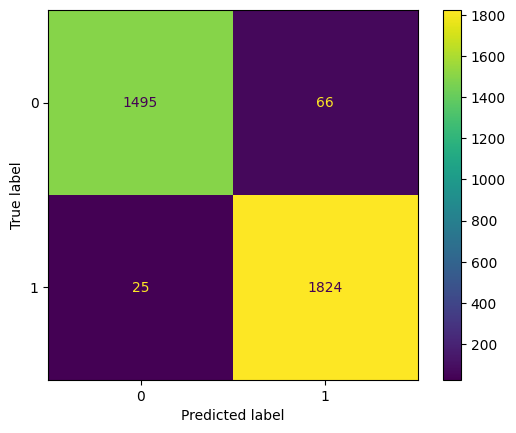

In [61]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 97%